# 数据预处理

In [41]:
import pandas as pd
#dataframe   转 numpy
#data = pd.read_csv('data.csv', names=['x1', 'x2', 'y']).values
data = pd.read_csv('data.csv', names=['x1', 'x2', 'y'])
print(data.head())
data.describe()

    x1   x2  y
0  7.0  4.7  1
1  6.4  4.5  1
2  6.9  4.9  1
3  5.5  4.0  1
4  6.5  4.6  1


,x1,x2,y
count,100.000000,100.000000,100.000000
mean,5.471000,2.861000,0.500000
std,0.641698,1.449549,0.502519
min,4.300000,1.000000,0.000000
25%,5.000000,1.500000,0.000000
50%,5.400000,2.450000,0.500000
75%,5.900000,4.325000,1.000000
max,7.000000,5.100000,1.000000


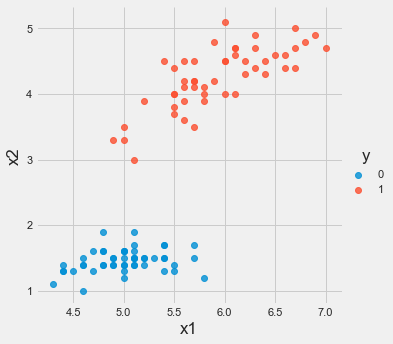

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt

sns.lmplot('x1', 'x2', hue='y', data=data, fit_reg=False)
plt.show()#看下数据的样子

In [1]:
#import numpy as np
#x = np.loadtxt("data.csv",delimiter=",",usecols=(0,1))
#y = np.loadtxt("data.csv",delimiter=",",usecols=(2,))
x=data.iloc[:,[0,1]].values
y=data.iloc[:,[2,]].values

NameError: name 'data' is not defined

# 准备训练测试数据

In [43]:
from sklearn.model_selection import train_test_split

#把数据集分为训练集和测试集
#train_data：被划分的样本特征集
#train_target：被划分的样本标签
#test_size：如果是浮点数，在0-1之间，表示测试样本占比；如果是整数的话就是样本的数量
#random_state：是随机数的种子，就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。
X_train,X_test,y_train,y_test = train_test_split(x, y,test_size=0.25,random_state=42)


# 使用逻辑回归进行预测任务

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

# 标准化数据，保证每个维度的特征数据方差为1，均值为0。使得预测结果不会被某些维度过大的特征值而主导
ss = StandardScaler()

#fit 是为计算该类处理所需的相关参数，以标准化为例，fit()就是计算标准化所用到的均值与方差
#transform：利用fit（）的结果作为参数对数据进行相应的处理，比如正规化。
#fit_transform :可以看做是fit和transform的结合，如果训练阶段使用fit_transform，则在测试阶段只需要对测试样本进行transform就行了。
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
#print(X_train)
#print(X_test)
# 初始化 LogisticRegression
 
lr = LogisticRegression(C=1.0, penalty='l1', tol=0.04, solver = 'liblinear')
 
# 跳用LogisticRegression中的fit函数／模块来训练模型参数
lr.fit(X_train, y_train.ravel())


#保存模型
joblib.dump(lr, "5_sk_lr.m")


In [53]:
#加载模型
n_lr = joblib.load("5_sk_lr.m")


lr_y_predict = n_lr.predict(X_test)

# 性能分析

In [54]:
from sklearn.metrics import classification_report
 
# 利用逻辑斯蒂回归自带的评分函数score获得模型在测试集上的准确定结果
print ('score：',lr.score(X_test,y_test))
 
print (classification_report(y_test,lr_y_predict,target_names = ['die','alive']))

score： 1.0
              precision    recall  f1-score   support

         die       1.00      1.00      1.00        11
       alive       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

